In [1]:
#Análise de séries temporais em Python
#Problemas de negócio: Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em janeiro de 2024?

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
#Carregar o dataset
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(365, 2)

In [5]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [8]:
#Valores mínimos da coluna data
df_dsa['Data'].min()

'2023-01-01'

In [9]:
#Valor máximo da coluna data
df_dsa['Data'].max()

'2023-12-31'

In [10]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
Data            365 non-null object
Total_Vendas    365 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
#Converter a coluna do data no tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [12]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [13]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
Data            365 non-null datetime64[ns]
Total_Vendas    365 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
#Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [15]:
type(serie_temporal)

pandas.core.series.Series

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
2023-01-06    39.330036
2023-01-07    50.377749
2023-01-08    54.187174
2023-01-09    55.870943
2023-01-10    62.912079
2023-01-11    52.521749
2023-01-12    43.882514
2023-01-13    42.060532
2023-01-14    33.265284
2023-01-15    42.075411
2023-01-16    55.756877
2023-01-17    55.485124
2023-01-18    56.760074
2023-01-19    42.021042
2023-01-20    34.139202
2023-01-21    50.509929
2023-01-22    49.921118
2023-01-23    59.255956
2023-01-24    53.775538
2023-01-25    52.816924
2023-01-26    47.465776
2023-01-27    35.795753
2023-01-28    45.410175
2023-01-29    48.396807
2023-01-30    57.809846
                ...    
2023-12-02    58.196398
2023-12-03    62.672514
2023-12-04    73.061386
2023-12-05    78.713936
2023-12-06    68.470215
2023-12-07    58.550061
2023-12-08    58.519157
2023-12-09    60.506518
2023-12-10    64.615284
2023-12-11    72.663123
2023-12-12 

In [17]:
#Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [18]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
2023-01-06    39.330036
2023-01-07    50.377749
2023-01-08    54.187174
2023-01-09    55.870943
2023-01-10    62.912079
2023-01-11    52.521749
2023-01-12    43.882514
2023-01-13    42.060532
2023-01-14    33.265284
2023-01-15    42.075411
2023-01-16    55.756877
2023-01-17    55.485124
2023-01-18    56.760074
2023-01-19    42.021042
2023-01-20    34.139202
2023-01-21    50.509929
2023-01-22    49.921118
2023-01-23    59.255956
2023-01-24    53.775538
2023-01-25    52.816924
2023-01-26    47.465776
2023-01-27    35.795753
2023-01-28    45.410175
2023-01-29    48.396807
2023-01-30    57.809846
                ...    
2023-12-02    58.196398
2023-12-03    62.672514
2023-12-04    73.061386
2023-12-05    78.713936
2023-12-06    68.470215
2023-12-07    58.550061
2023-12-08    58.519157
2023-12-09    60.506518
2023-12-10    64.615284
2023-12-11    72.663123
2023-12-12 

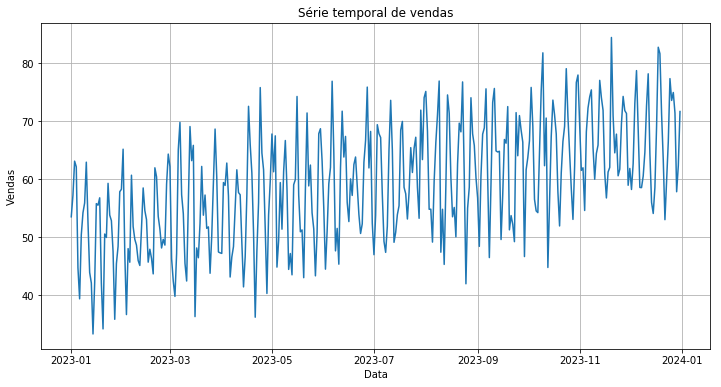

In [19]:
#Cria o gráfico da série temporal (sem formação)
plt.figure(figsize = (12,6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série temporal de vendas')
plt.grid(True)
plt.show()

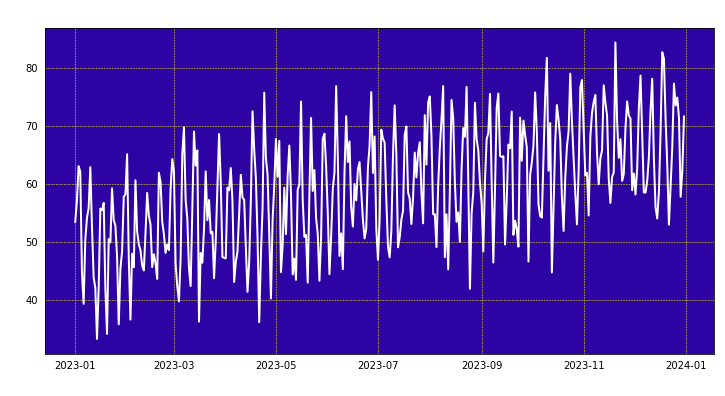

In [20]:
#Cria o gráfico da série temporal(com formatação)

#Cria o  gráfico da série temporal com o layout de contraste
plt.figure(figsize = (12,6))
plt.plot(serie_temporal,color = 'white', linewidth = 2)

#Configurar cores e estilo de gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

#Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'white', fontsize = 14)
plt.ylabel('Vendas', color = 'white', fontsize = 14)
plt.title('Série temporal  de vendas', color = 'white', fontsize = 18)

#Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x',color = 'white')
plt.tick_params(axis = 'y', color = 'white')

plt.show()

In [21]:
#Cria o modelo (Esta linha cria uma instância de classe SimpleExpSoothing utilizando a coluna 'Vendas' da série série_temporal como entrada)
modelo = SimpleExpSmoothing(serie_temporal)

In [22]:
#Treinamento (ajuste) do modelo

#Esta  linha faz uma chamada ao método fit() para ajustar o modelo de suavização exponencial aos dados. O argumento smoothing_level = 0.2 define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

modelo_ajustado = modelo.fit(smoothing_level= 0.2)

In [23]:
#Extrai os valores previstos pelo modelo

#Esta linha extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão. O resultado final é uma nova série temporal chamada suavizacao_exponencial, que representa a versão suavizada da série original de vendas, com menos ruído e flutuação de curto prazo.

suavizacao_exponencial = modelo_ajustado.fittedvalues

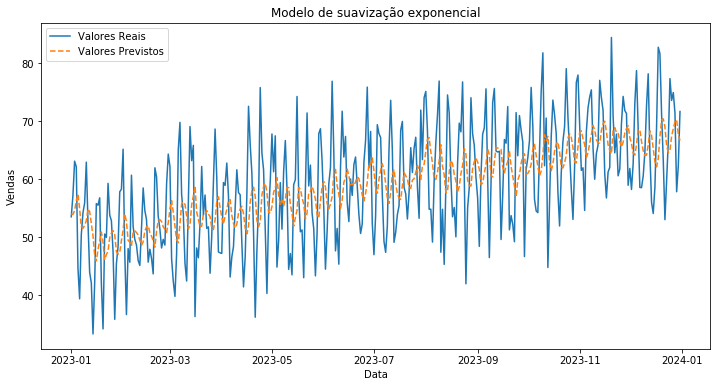

In [24]:
#Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de suavização exponencial')
plt.legend()
plt.show()


In [25]:
#Deploye previsões com o modelo treinado

In [26]:
#Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [27]:
print(f'Previsão do total de vendas para janeiro de 2024: {round(previsoes [0], 4)}')

Previsão do total de vendas para janeiro de 2024: 67.6499
